In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import load_boston

In [2]:
boston = load_boston()
bos = pd.DataFrame(boston.data)

In [27]:
bos

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [4]:
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [5]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [6]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [7]:
bos.shape

(506, 13)

In [8]:
bos.columns = boston.feature_names
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [9]:
bos['PRICE'] = boston.target
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [10]:
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [11]:
bos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [12]:
bos.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'PRICE'],
      dtype='object')

In [13]:
#Let's start with importing necessary libraries

import pandas as pd 
import numpy as np 
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [14]:
y = bos['PRICE']
X =bos.drop(columns = ['PRICE'])

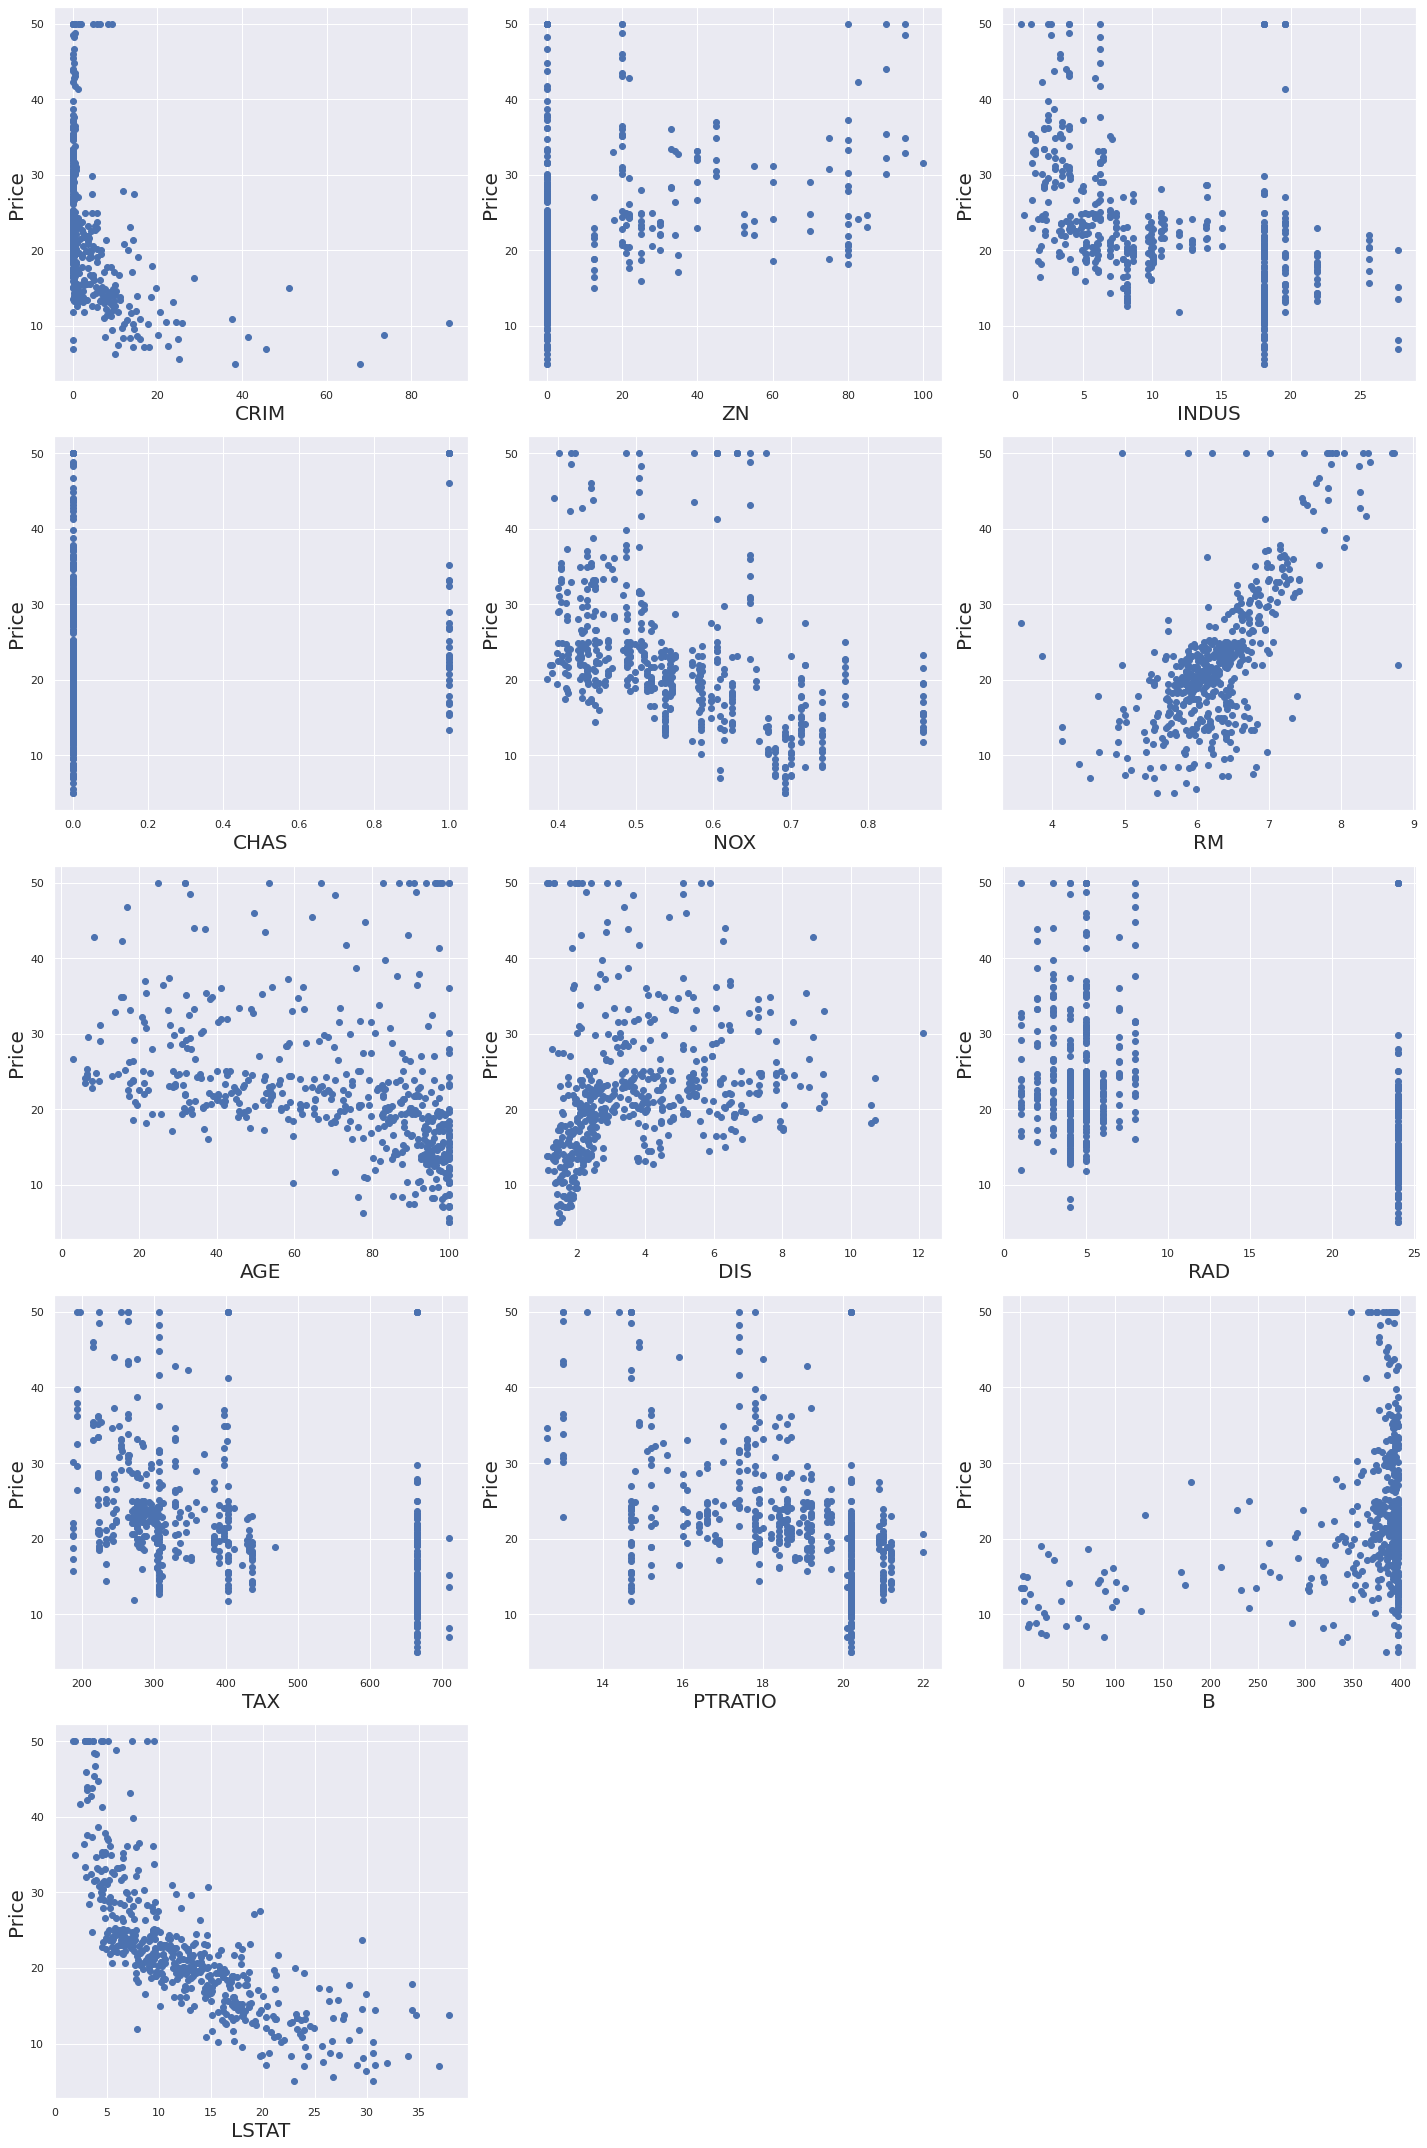

In [15]:
plt.figure(figsize=(20,30), facecolor='white')
plotnumber = 1

for column in X:
    if plotnumber<=15 :
        ax = plt.subplot(5,3,plotnumber)
        plt.scatter(X[column],y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Price',fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [16]:
scaler =StandardScaler()

X_scaled = scaler.fit_transform(X)
X_scaled

array([[-0.41978194,  0.28482986, -1.2879095 , ..., -1.45900038,
         0.44105193, -1.0755623 ],
       [-0.41733926, -0.48772236, -0.59338101, ..., -0.30309415,
         0.44105193, -0.49243937],
       [-0.41734159, -0.48772236, -0.59338101, ..., -0.30309415,
         0.39642699, -1.2087274 ],
       ...,
       [-0.41344658, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.98304761],
       [-0.40776407, -0.48772236,  0.11573841, ...,  1.17646583,
         0.4032249 , -0.86530163],
       [-0.41500016, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.66905833]])

In [17]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = X_scaled

# we create a new data frame which will include all the VIFs
# note that each variable has its own variance inflation factor as this measure is variable specific (not model specific)
# we do not include categorical values for mulitcollinearity as they do not provide much information as numerical ones do
vif = pd.DataFrame()

# here we make use of the variance_inflation_factor, which will basically output the respective VIFs 
vif["VIF"] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
# Finally, I like to include names so it is easier to explore the result
vif["Features"] = X.columns

In [18]:
vif

,VIF,Features
0,1.792192,CRIM
1,2.298758,ZN
2,3.991596,INDUS
3,1.073995,CHAS
4,4.393720,NOX
5,1.933744,RM
6,3.100826,AGE
7,3.955945,DIS
8,7.484496,RAD
9,9.008554,TAX


In [28]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state=355)

In [29]:
x_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
227,0.41238,0.0,6.20,0.0,0.504,7.163,79.9,3.2157,8.0,307.0,17.4,372.08,6.36
382,9.18702,0.0,18.10,0.0,0.700,5.536,100.0,1.5804,24.0,666.0,20.2,396.90,23.60
23,0.98843,0.0,8.14,0.0,0.538,5.813,100.0,4.0952,4.0,307.0,21.0,394.54,19.88
348,0.01501,80.0,2.01,0.0,0.435,6.635,29.7,8.3440,4.0,280.0,17.0,390.94,5.99
157,1.22358,0.0,19.58,0.0,0.605,6.943,97.4,1.8773,5.0,403.0,14.7,363.43,4.59
...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,0.07886,80.0,4.95,0.0,0.411,7.148,27.7,5.1167,4.0,245.0,19.2,396.90,3.56
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
346,0.06162,0.0,4.39,0.0,0.442,5.898,52.3,8.0136,3.0,352.0,18.8,364.61,12.67
130,0.34006,0.0,21.89,0.0,0.624,6.458,98.9,2.1185,4.0,437.0,21.2,395.04,12.60


In [30]:
regression = LinearRegression()

regression.fit(x_train,y_train)

LinearRegression()

In [31]:
regression.score(x_train,y_train)

0.730647531347494

In [32]:
regression.score(x_test,y_test)

0.751903032926235

In [35]:
import pickle
# saving the model to the local file system
filename = 'finalised_model.pickle'
pickle.dump(regression, open(filename, 'wb'))

In [34]:
# prediction using the saved model
loaded_model = pickle.load(open(filename, 'rb'))
a=loaded_model.predict([[0.00632, 18.0, 2.31, 0.0, 0.538, 6.575, 65.2, 4.0900, 1.0, 296.0, 15.3, 396.90, 4.98]])
a

array([29.41519703])

In [102]:
# Lasso Regularization
# LassoCV will return best alpha and coefficients after performing 10 cross validations
lasscv = LassoCV(alphas = None,cv =10, max_iter = 100000, normalize = True)
lasscv.fit(x_train, y_train)

LassoCV(cv=10, max_iter=100000, normalize=True)

In [103]:
# best alpha parameter
alpha = lasscv.alpha_
alpha

0.00033837642965584014

In [104]:
#now that we have best parameter, let's use Lasso regression and see how well our data has fitted before

lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=0.00033837642965584014)

In [105]:
lasso_reg.score(x_train,y_train)

0.7306474635903696

In [106]:
lasso_reg.score(x_test,y_test)

0.7518957038694827

In [122]:
lasso_reg.coef_

array([-0.88578003,  1.17422039, -0.11673284,  0.95482986, -1.98632653,
        3.10709563, -0.39168906, -3.18504563,  2.28370527, -1.82108384,
       -1.84510311,  0.82014454, -2.89910565])

In [108]:
# Using Ridge regression model
# RidgeCV will return best alpha and coefficients after performing 10 cross validations. 
# We will pass an array of random numbers for ridgeCV to select best alpha from them

alphas = np.random.uniform(low=0, high=10, size=(50,))
ridgecv = RidgeCV(alphas = alphas,cv=10,normalize = True)
ridgecv.fit(x_train, y_train)

RidgeCV(alphas=array([6.78877503, 9.91925674, 2.22563971, 3.29829684, 1.54699258,
       1.73236927, 2.44197048, 1.80911161, 7.86362942, 6.79444501,
       2.43871003, 2.34686301, 1.00374505, 3.25216288, 0.53026865,
       4.19650371, 1.63588476, 1.73589752, 7.42898872, 4.80246465,
       9.73311514, 0.61902822, 4.38570524, 9.65846871, 0.76598178,
       0.44744044, 4.25447341, 5.80068125, 2.99429619, 3.77588182,
       6.4021601 , 2.3411428 , 7.42555733, 8.49684061, 6.79428756,
       8.20676053, 4.27600873, 4.15968495, 9.90555105, 7.31364559,
       4.8314515 , 3.999369  , 2.3100698 , 5.32840647, 9.08288765,
       8.56405057, 4.73035895, 8.53307432, 2.79387828, 2.00967173]),
        cv=10, normalize=True)

In [109]:
ridgecv.alpha_

0.44744043774700204

In [110]:
ridge_model = Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(x_train, y_train)

Ridge(alpha=0.44744043774700204)

In [111]:
ridge_model.score(x_test, y_test)

0.7516621975826788

In [112]:
ridge_model.coef_

array([-0.88107603,  1.16672424, -0.12909285,  0.95631852, -1.97167278,
        3.10887295, -0.39238706, -3.16919095,  2.25207816, -1.7906768 ,
       -1.84200994,  0.81953048, -2.89554811])

In [113]:
# Elastic net

elasticCV = ElasticNetCV(alphas = None, cv =10)

elasticCV.fit(x_train, y_train)

ElasticNetCV(cv=10)

In [114]:
elasticCV.alpha_

0.013238147250836638

In [115]:
# l1_ration gives how close the model is to L1 regularization, below value indicates we are giving equal
#preference to L1 and L2
elasticCV.l1_ratio

0.5

In [116]:
elasticnet_reg = ElasticNet(alpha = elasticCV.alpha_,l1_ratio=0.5)
elasticnet_reg.fit(x_train, y_train)

ElasticNet(alpha=0.013238147250836638)

In [117]:
elasticnet_reg.score(x_test, y_test)

0.7503011494807524